## Varying Number of Samples

n = 5: Probability of ML estimate being close to the ground truth = 0.081
n = 10: Probability of ML estimate being close to the ground truth = 0.170
n = 20: Probability of ML estimate being close to the ground truth = 0.303
n = 40: Probability of ML estimate being close to the ground truth = 0.556
n = 80: Probability of ML estimate being close to the ground truth = 0.368
n = 160: Probability of ML estimate being close to the ground truth = 0.623


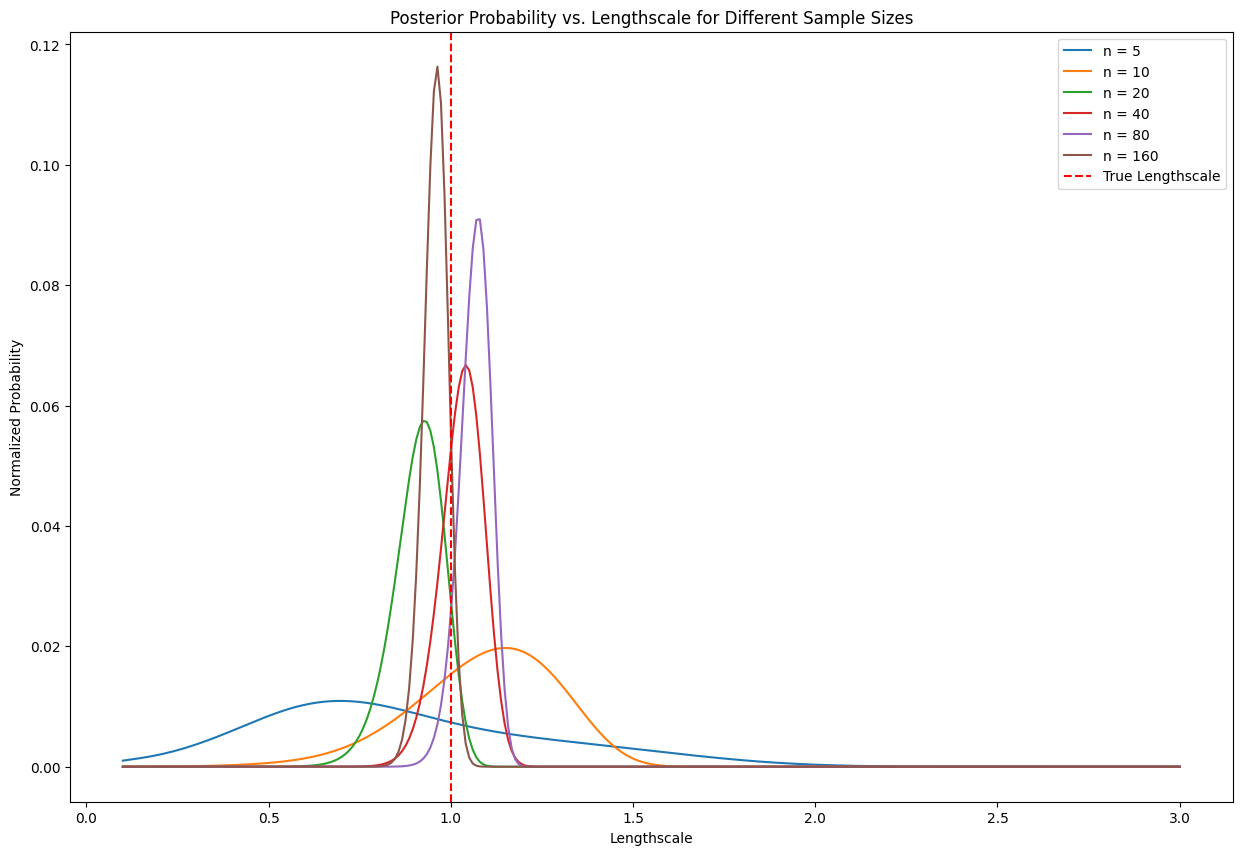

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow

# Ground truth GP hyperparameters
true_lengthscale = 1.0
true_variance = 1.0
sigma = 0.01

# Define ground truth kernel
kernel = lambda X: true_variance * np.exp(-0.5 * np.subtract.outer(X[:, 0], X[:, 0]) ** 2 / true_lengthscale**2)

# Define a function to compute the marginal likelihood for a given lengthscale
def compute_marginal_likelihood(X, y_noisy, lengthscale):
    kernel_gpflow = gpflow.kernels.SquaredExponential(lengthscales=lengthscale, variance=true_variance)
    model = gpflow.models.GPR(data=(X, y_noisy[:, None]), kernel=kernel_gpflow, mean_function=None)
    model.likelihood.variance.assign(sigma**2)
    return model.log_marginal_likelihood().numpy()

# Number of data points to test
num_points_list = [5, 10, 20, 40, 80, 160]
lengthscales = np.linspace(0.1, 3.0, 300)

plt.figure(figsize=(15, 10))

for num_points in num_points_list:
    # Sample datapoints uniformly from the range [-5, 5]
    X = np.sort(np.random.uniform(-5, 5, num_points))[:, None]
    K = kernel(X)
    mean = np.zeros(X.shape[0])
    f_samples = np.random.multivariate_normal(mean, K)

    # Generate noisy observations
    y_noisy = f_samples + sigma * np.random.randn(num_points)

    # Evaluate the marginal likelihood for a range of lengthscales
    log_marginal_likelihoods = [compute_marginal_likelihood(X, y_noisy, ls) for ls in lengthscales]

    # Convert log marginal likelihoods to probabilities
    probabilities = np.exp(log_marginal_likelihoods - np.max(log_marginal_likelihoods))
    probabilities /= np.sum(probabilities)

    # Compute the probability that the lengthscale is close to the true value
    true_lengthscale_idx = np.argmin(np.abs(lengthscales - true_lengthscale))
    integration_range = 5  # Number of points around the true lengthscale to consider
    start_idx = max(0, true_lengthscale_idx - integration_range)
    end_idx = min(len(lengthscales), true_lengthscale_idx + integration_range + 1)
    probability_close = np.sum(probabilities[start_idx:end_idx])

    # Print the results
    print(f"n = {num_points}: Probability of ML estimate being close to the ground truth = {probability_close:.3f}")

    # Plot the marginal likelihood vs. lengthscale
    plt.plot(lengthscales, probabilities, label=f"n = {num_points}")

plt.axvline(true_lengthscale, color="red", linestyle="--", label="True Lengthscale")
plt.xlabel("Lengthscale")
plt.ylabel("Normalized Probability")
plt.title("Posterior Probability vs. Lengthscale for Different Sample Sizes")
plt.legend()
plt.show()


## Varying Noise

Noise level = 0.01: Probability of ML estimate being close to the ground truth = 0.693
Noise level = 0.05: Probability of ML estimate being close to the ground truth = 0.545
Noise level = 0.10: Probability of ML estimate being close to the ground truth = 0.437
Noise level = 0.20: Probability of ML estimate being close to the ground truth = 0.290
Noise level = 0.50: Probability of ML estimate being close to the ground truth = 0.054
Noise level = 1.00: Probability of ML estimate being close to the ground truth = 0.103


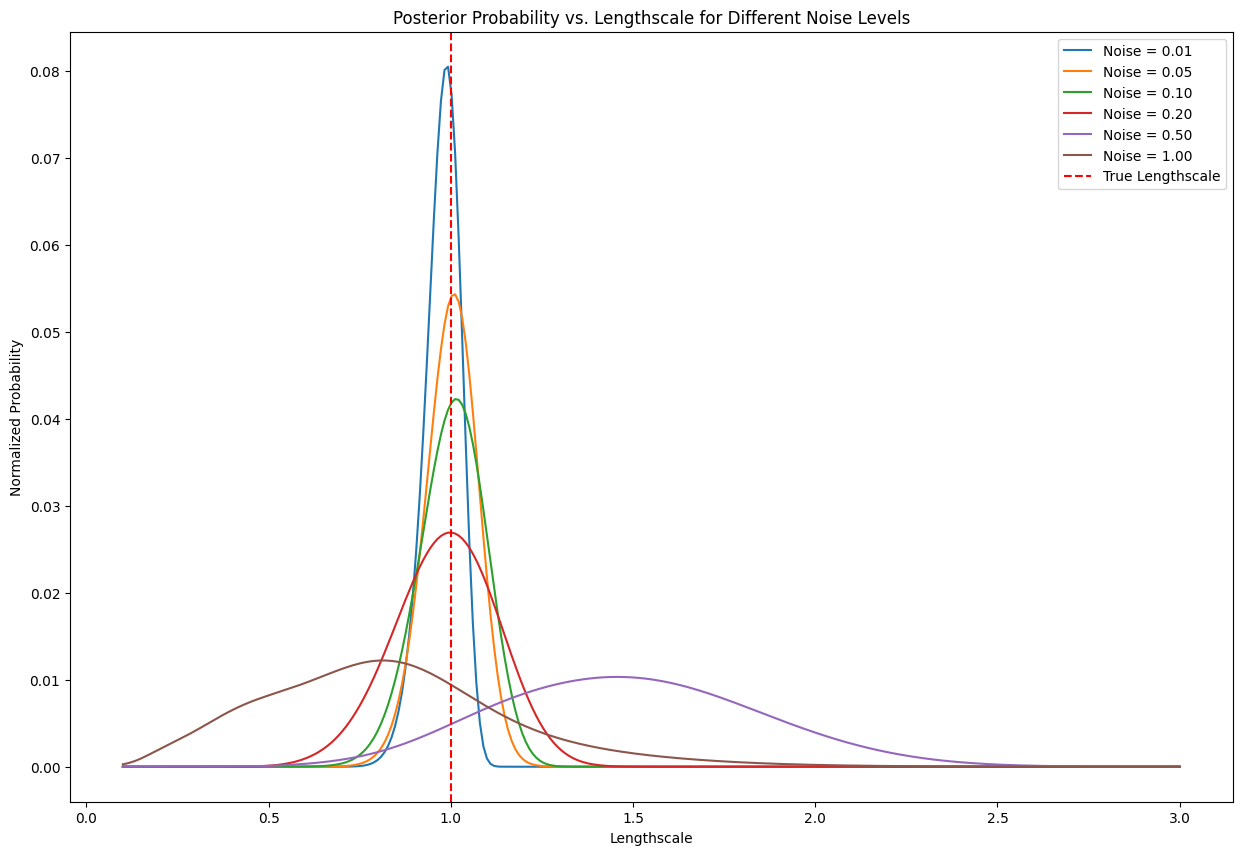

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow

# Ground truth GP hyperparameters
true_lengthscale = 1.0
true_variance = 1.0

# Define ground truth kernel
kernel = lambda X: true_variance * np.exp(-0.5 * np.subtract.outer(X[:, 0], X[:, 0]) ** 2 / true_lengthscale**2)

# Define a function to compute the marginal likelihood for a given lengthscale
def compute_marginal_likelihood(X, y_noisy, lengthscale, sigma):
    kernel_gpflow = gpflow.kernels.SquaredExponential(lengthscales=lengthscale, variance=true_variance)
    model = gpflow.models.GPR(data=(X, y_noisy[:, None]), kernel=kernel_gpflow, mean_function=None)
    model.likelihood.variance.assign(sigma**2)
    return model.log_marginal_likelihood().numpy()

# Noise levels to test
noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
num_points = 40
lengthscales = np.linspace(0.1, 3.0, 300)

plt.figure(figsize=(15, 10))

for sigma in noise_levels:
    # Sample datapoints uniformly from the range [-5, 5]
    X = np.sort(np.random.uniform(-5, 5, num_points))[:, None]
    K = kernel(X)
    mean = np.zeros(X.shape[0])
    f_samples = np.random.multivariate_normal(mean, K)

    # Generate noisy observations
    y_noisy = f_samples + sigma * np.random.randn(num_points)

    # Evaluate the marginal likelihood for a range of lengthscales
    log_marginal_likelihoods = [compute_marginal_likelihood(X, y_noisy, ls, sigma) for ls in lengthscales]

    # Convert log marginal likelihoods to probabilities
    probabilities = np.exp(log_marginal_likelihoods - np.max(log_marginal_likelihoods))
    probabilities /= np.sum(probabilities)

    # Compute the probability that the lengthscale is close to the true value
    true_lengthscale_idx = np.argmin(np.abs(lengthscales - true_lengthscale))
    integration_range = 5  # Number of points around the true lengthscale to consider
    start_idx = max(0, true_lengthscale_idx - integration_range)
    end_idx = min(len(lengthscales), true_lengthscale_idx + integration_range + 1)
    probability_close = np.sum(probabilities[start_idx:end_idx])

    # Print the results
    print(f"Noise level = {sigma:.2f}: Probability of ML estimate being close to the ground truth = {probability_close:.3f}")

    # Plot the marginal likelihood vs. lengthscale
    plt.plot(lengthscales, probabilities, label=f"Noise = {sigma:.2f}")

plt.axvline(true_lengthscale, color="red", linestyle="--", label="True Lengthscale")
plt.xlabel("Lengthscale")
plt.ylabel("Normalized Probability")
plt.title("Posterior Probability vs. Lengthscale for Different Noise Levels")
plt.legend()
plt.show()


Noise level = 0.01: Probability of ML estimate being close to the ground truth = 0.381
Noise level = 0.05: Probability of ML estimate being close to the ground truth = 0.159
Noise level = 0.10: Probability of ML estimate being close to the ground truth = 0.124
Noise level = 0.20: Probability of ML estimate being close to the ground truth = 0.099
Noise level = 0.50: Probability of ML estimate being close to the ground truth = 0.114
Noise level = 1.00: Probability of ML estimate being close to the ground truth = 0.054


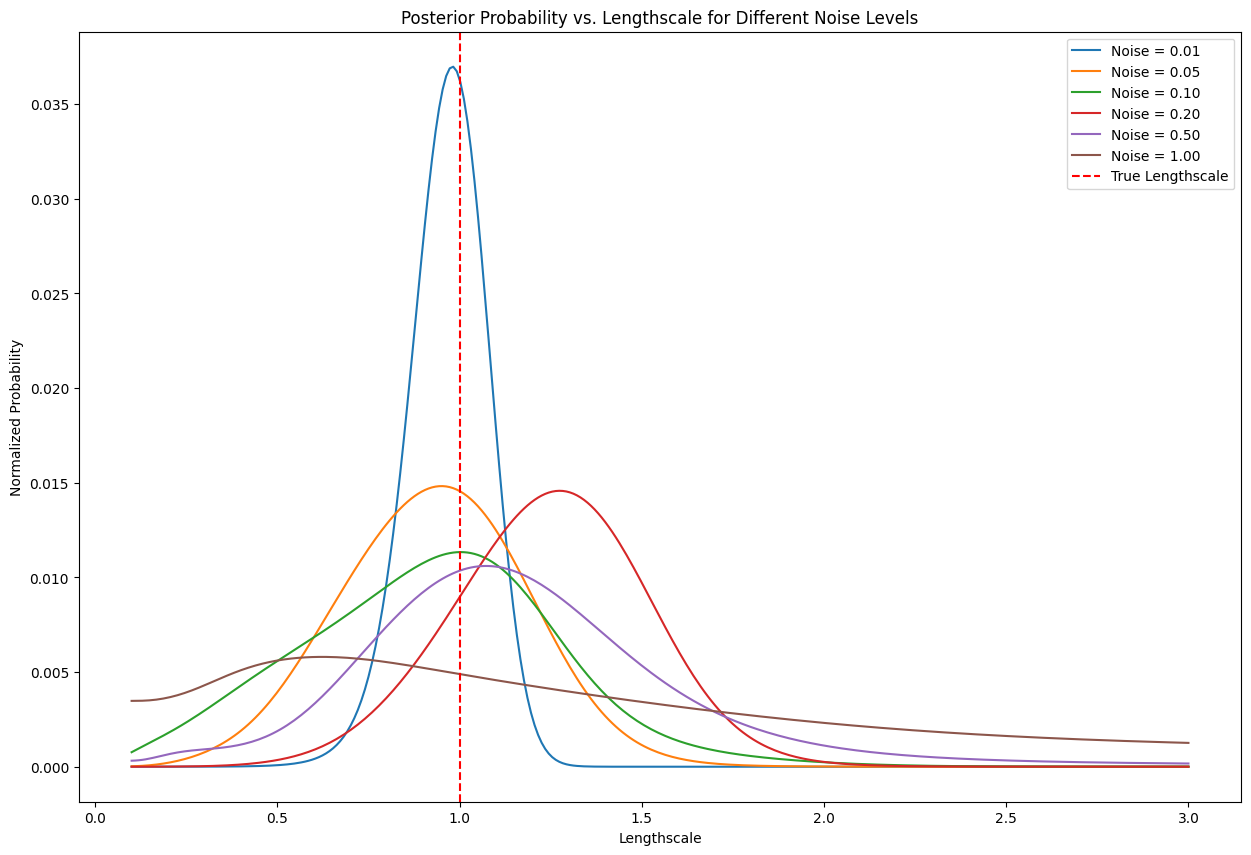

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow

# Ground truth GP hyperparameters
true_lengthscale = 1.0
true_variance = 1.0

# Define ground truth kernel
kernel = lambda X: true_variance * np.exp(-0.5 * np.subtract.outer(X[:, 0], X[:, 0]) ** 2 / true_lengthscale**2)

# Define a function to compute the marginal likelihood for a given lengthscale
def compute_marginal_likelihood(X, y_noisy, lengthscale, sigma):
    kernel_gpflow = gpflow.kernels.SquaredExponential(lengthscales=lengthscale, variance=true_variance)
    model = gpflow.models.GPR(data=(X, y_noisy[:, None]), kernel=kernel_gpflow, mean_function=None)
    model.likelihood.variance.assign(sigma**2)
    return model.log_marginal_likelihood().numpy()

# Noise levels to test
noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
num_points = 10
lengthscales = np.linspace(0.1, 3.0, 300)

plt.figure(figsize=(15, 10))

for sigma in noise_levels:
    # Sample datapoints uniformly from the range [-5, 5]
    X = np.sort(np.random.uniform(-5, 5, num_points))[:, None]
    K = kernel(X)
    mean = np.zeros(X.shape[0])
    f_samples = np.random.multivariate_normal(mean, K)

    # Generate noisy observations
    y_noisy = f_samples + sigma * np.random.randn(num_points)

    # Evaluate the marginal likelihood for a range of lengthscales
    log_marginal_likelihoods = [compute_marginal_likelihood(X, y_noisy, ls, sigma) for ls in lengthscales]

    # Convert log marginal likelihoods to probabilities
    probabilities = np.exp(log_marginal_likelihoods - np.max(log_marginal_likelihoods))
    probabilities /= np.sum(probabilities)

    # Compute the probability that the lengthscale is close to the true value
    true_lengthscale_idx = np.argmin(np.abs(lengthscales - true_lengthscale))
    integration_range = 5  # Number of points around the true lengthscale to consider
    start_idx = max(0, true_lengthscale_idx - integration_range)
    end_idx = min(len(lengthscales), true_lengthscale_idx + integration_range + 1)
    probability_close = np.sum(probabilities[start_idx:end_idx])

    # Print the results
    print(f"Noise level = {sigma:.2f}: Probability of ML estimate being close to the ground truth = {probability_close:.3f}")

    # Plot the marginal likelihood vs. lengthscale
    plt.plot(lengthscales, probabilities, label=f"Noise = {sigma:.2f}")

plt.axvline(true_lengthscale, color="red", linestyle="--", label="True Lengthscale")
plt.xlabel("Lengthscale")
plt.ylabel("Normalized Probability")
plt.title("Posterior Probability vs. Lengthscale for Different Noise Levels")
plt.legend()
plt.show()
